In [45]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
import seaborn as sn
from sklearn.metrics import classification_report
%matplotlib inline

In [46]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context   #下载数据集

In [47]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()   #y是标签

In [48]:
X_train.shape    #数据集有60000张图片

(60000, 28, 28)

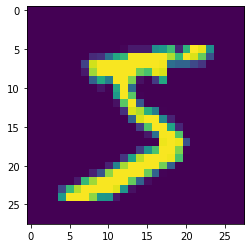

In [49]:
plt.imshow(X_train[0])  #显示第0张图片  

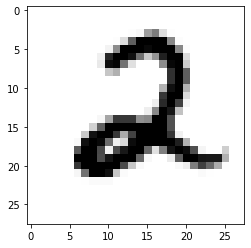

In [50]:
plt.imshow(X_train[3333],cmap="binary")  #不显示色彩

In [51]:
y_test.shape

(10000,)

In [52]:
#建立神经网络
model=tf.keras.models.Sequential()   #也可用方括号直接在圆括号内增加
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #第一层
model.add(tf.keras.layers.Dense(1024,activation="relu"))
model.add(tf.keras.layers.Dense(1024,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [53]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",  
             metrics=["acc"])  #精度

In [54]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [55]:
#训练模型
model.fit(X_train,y_train,epochs=15,batch_size=64,validation_split=0.2)

Epoch 1/15
750/750 [==============================] - 30s 38ms/step - loss: 2.7394 - acc: 0.9034 - val_loss: 0.3127 - val_acc: 0.9422
Epoch 2/15
750/750 [==============================] - 22s 29ms/step - loss: 0.2225 - acc: 0.9538 - val_loss: 0.2503 - val_acc: 0.9533
Epoch 3/15
750/750 [==============================] - 20s 27ms/step - loss: 0.1554 - acc: 0.9634 - val_loss: 0.2179 - val_acc: 0.9553
Epoch 4/15
750/750 [==============================] - 19s 26ms/step - loss: 0.1379 - acc: 0.9666 - val_loss: 0.2211 - val_acc: 0.9551
Epoch 5/15
750/750 [==============================] - 17s 23ms/step - loss: 0.1307 - acc: 0.9686 - val_loss: 0.1864 - val_acc: 0.9609
Epoch 6/15
750/750 [==============================] - 14s 18ms/step - loss: 0.1198 - acc: 0.9711 - val_loss: 0.2282 - val_acc: 0.9523
Epoch 7/15
750/750 [==============================] - 13s 17ms/step - loss: 0.1161 - acc: 0.9713 - val_loss: 0.2659 - val_acc: 0.9530
Epoch 8/15
750/750 [==============================] - 14s 19ms

In [56]:
#plt_plot(his_history.epochs,his.history.get("loss"))  #看训练过程

In [65]:
#预测
pre=model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [68]:
pred=np.argmax(pre,axis=1)

In [69]:
pre[0]

array([9.17140338e-24, 8.08005467e-20, 1.18137506e-23, 2.61278728e-17,
       7.28775281e-21, 3.30635291e-24, 0.00000000e+00, 9.99999940e-01,
       7.94513340e-22, 1.36627688e-12], dtype=float32)

In [70]:
#真实值
print(classification_report(y_test,pred))  

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.95      0.98      0.97       982
           5       0.91      0.98      0.94       892
           6       0.98      0.95      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.98      0.92      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [71]:
pre_=model.predict(X_train)

1875/1875 [==============================] - 10s 5ms/step


In [73]:
pre_d=np.argmax(pre_,axis=1)

In [74]:
print(classification_report(y_train,pre_d))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5923
           1       0.99      0.99      0.99      6742
           2       0.98      0.98      0.98      5958
           3       0.98      0.98      0.98      6131
           4       0.96      0.99      0.98      5842
           5       0.94      0.99      0.97      5421
           6       0.99      0.97      0.98      5918
           7       0.99      0.98      0.99      6265
           8       0.97      0.98      0.98      5851
           9       0.99      0.95      0.97      5949

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000

